In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\manoj kumar\Data Analyst\test Jupyter\jupyter project\Python_Diwali_Sales_Analysis-main (2)\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Exploratory Data analysis

## Gender

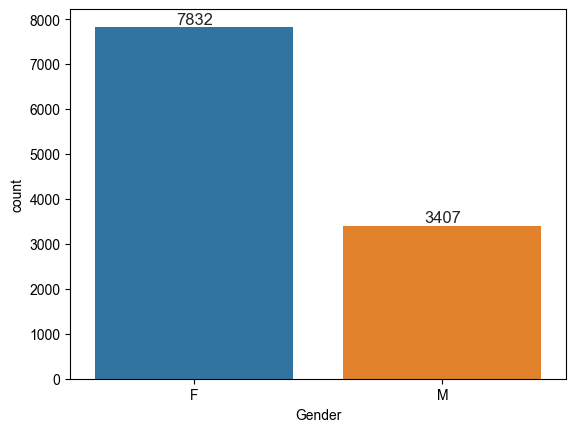

In [9]:
ax = sns.countplot(x='Gender',data=df)
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

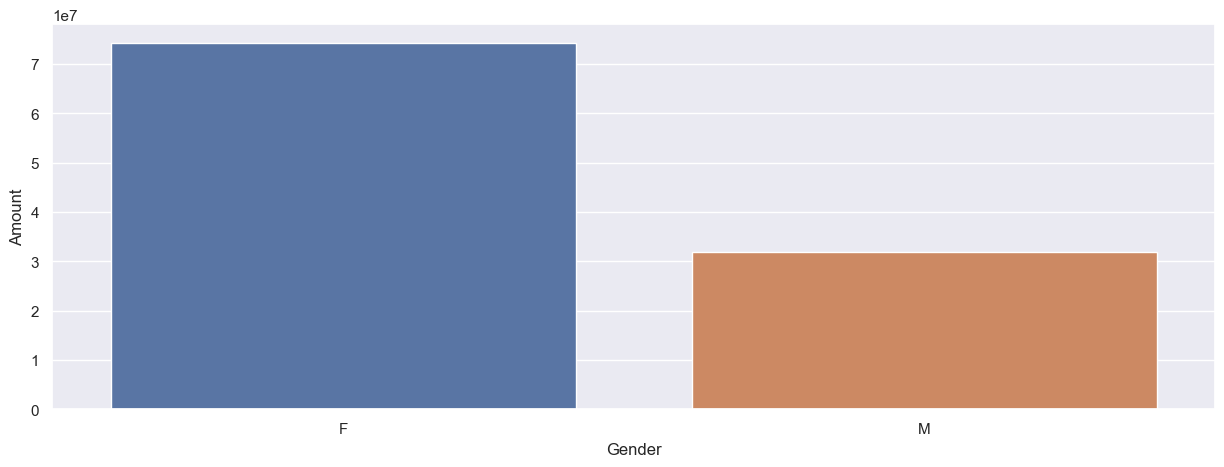

In [10]:
Sales_gen =df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Gender',y='Amount',data=Sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females greater than the man

## Age

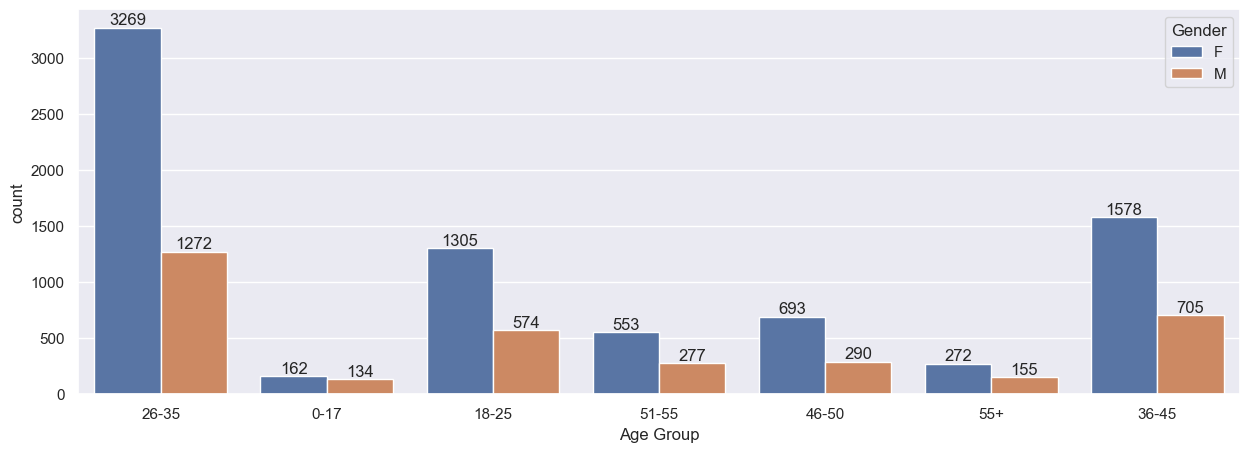

In [11]:
ax=sns.countplot(data=df,x='Age Group',hue= 'Gender')
sns.set(rc={'figure.figsize':(10,10)})
for bars in ax.containers:
    ax.bar_label(bars)

### Total Amount vs Age Group

<Axes: xlabel='Age Group', ylabel='Amount'>

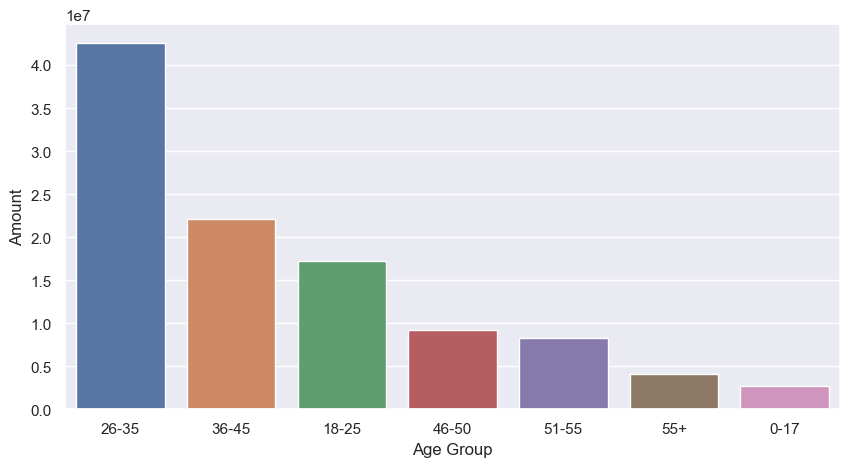

In [12]:
Sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x="Age Group",y="Amount",data=Sales_age)

From above graph we can see that most of the buyers are of age group 26-35 yrs Females

## State


### Total no. of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

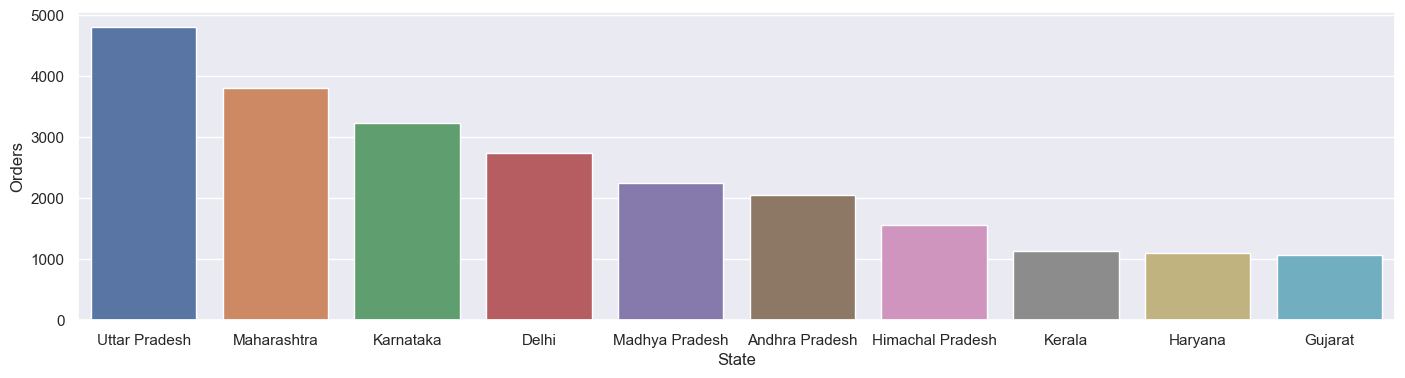

In [13]:
Sales_state= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,4)})
sns.barplot(data=Sales_state,x='State',y= 'Orders')


### total amount/sales from top 5 states

<Axes: xlabel='State', ylabel='Amount'>

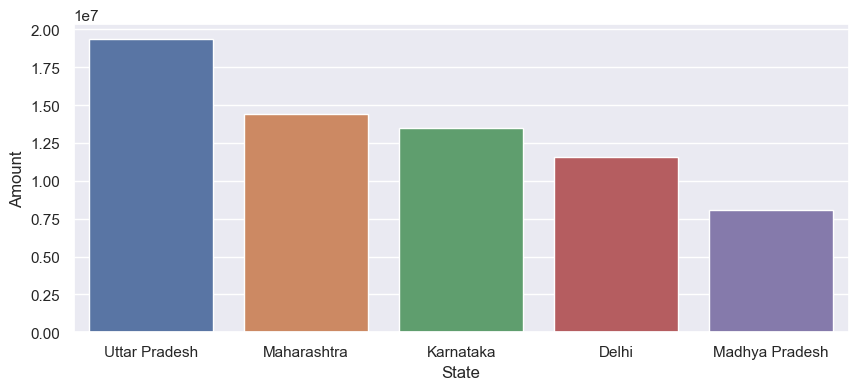

In [14]:
Sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=Sales_state,x='State',y='Amount')

From above graphs most of the orders and sales/amount from the states Uttar Pradesh,Maharashtra,Karnataka respectively

## Marital Satus

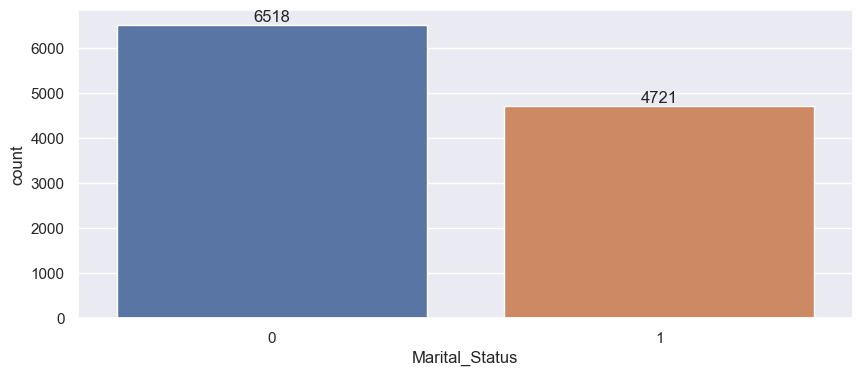

In [15]:
ax = sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

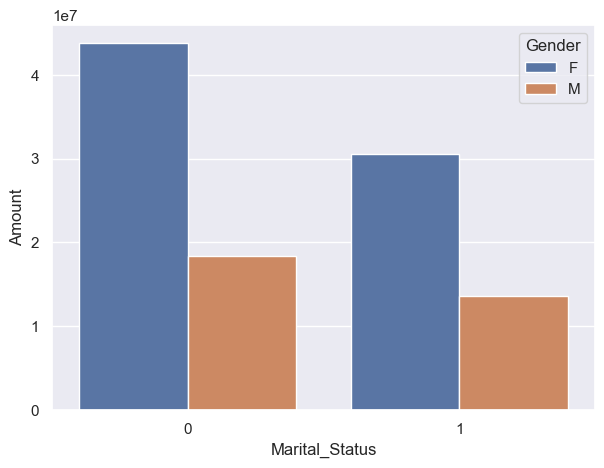

In [16]:
Sales= df.groupby(['Marital_Status','Gender'],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data=Sales,x='Marital_Status',y='Amount',hue='Gender')

From above graph we can see that most of buyers are married(women) and they have high purchasing power


## Occupation

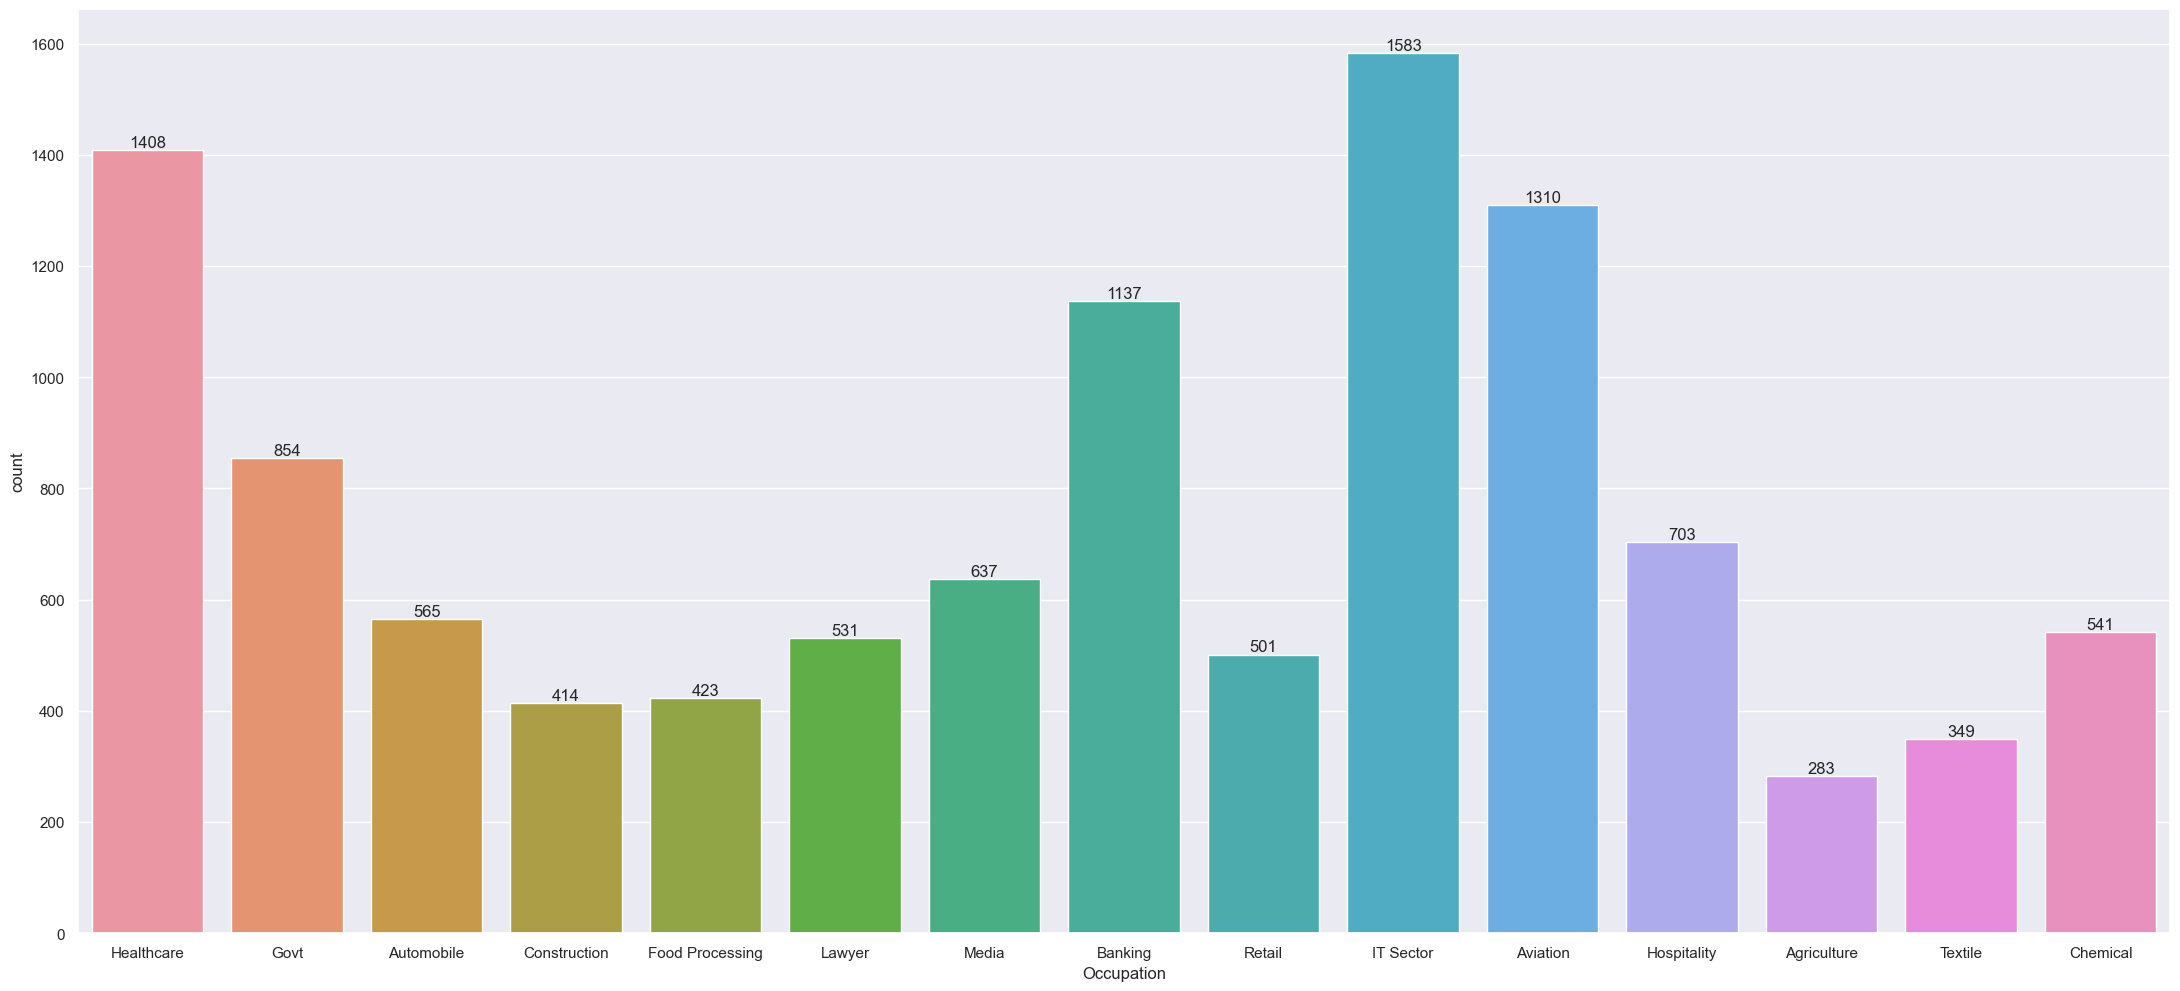

In [18]:
ax = sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(27,12)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

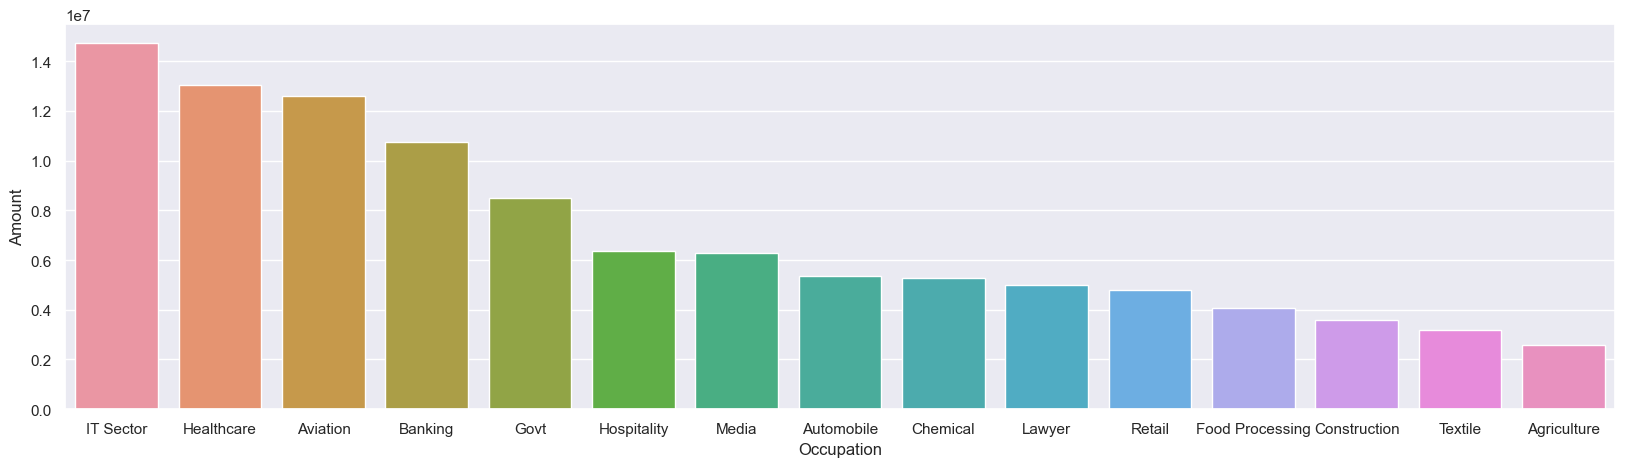

In [19]:
Sales_state= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_state,x='Occupation',y='Amount')

From above graphs we can see that most of the buyers are working in IT,HealthCare, Aviation sector

## Product Categary

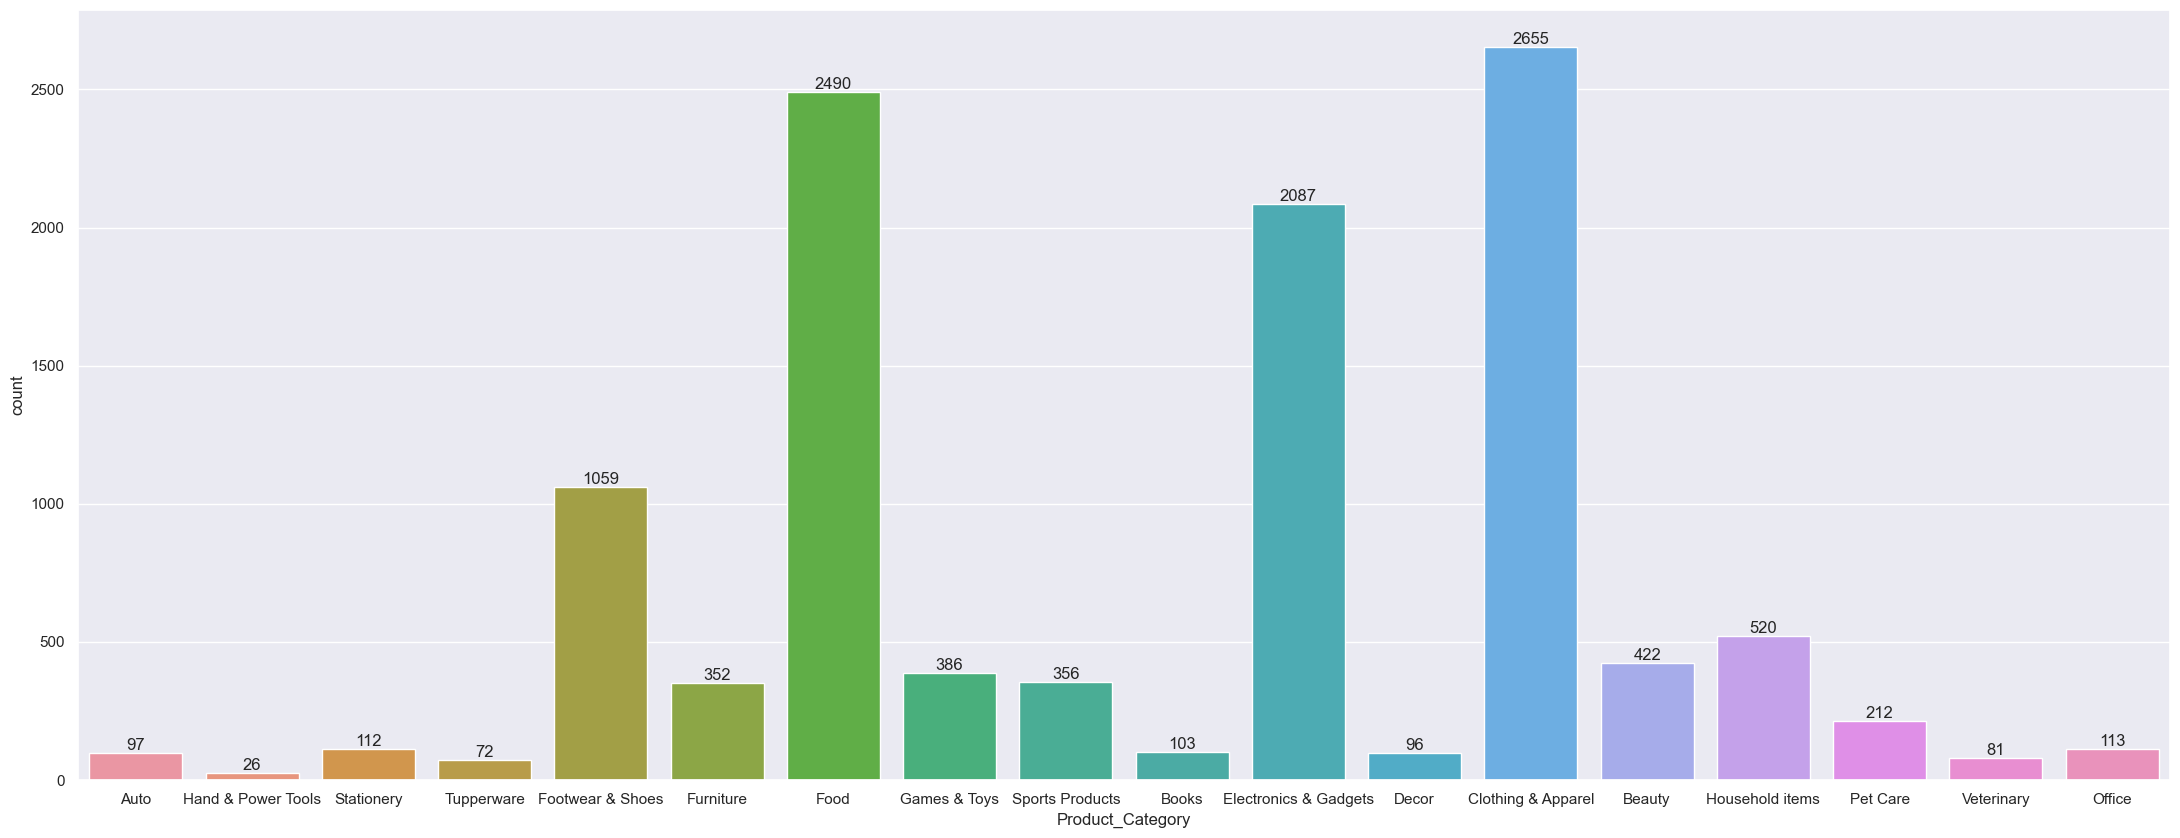

In [21]:
ax = sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(27,10)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

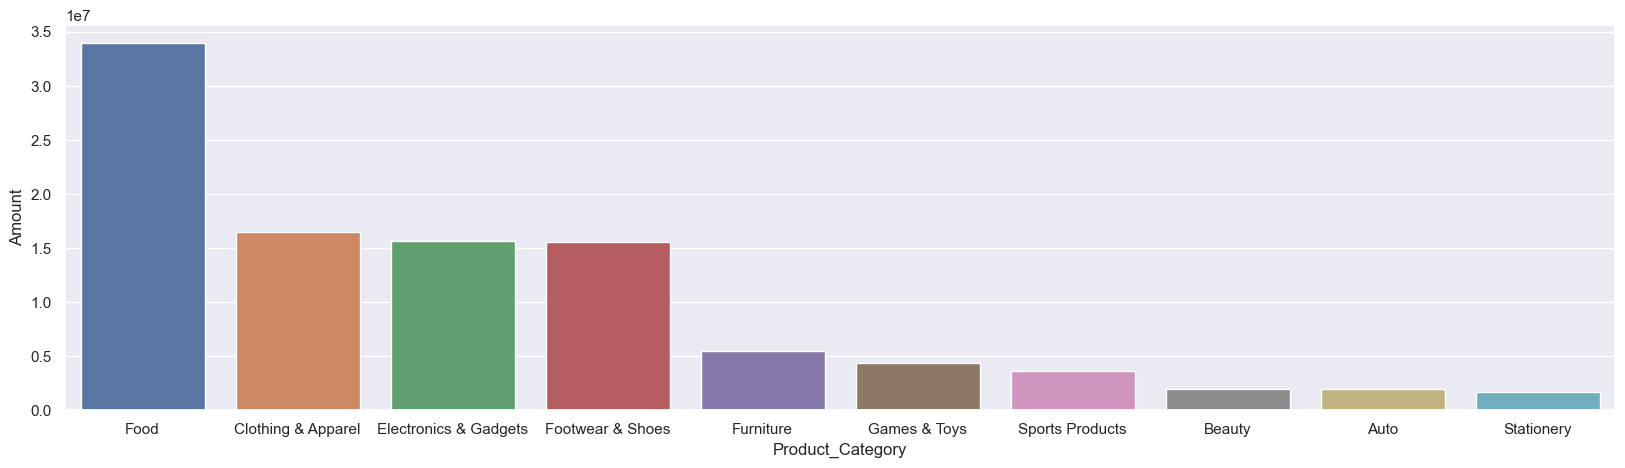

In [22]:
Sales_state= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_state,x='Product_Category',y='Amount')

From above graphs we can see that most of the sold product are Food,Clothing, and Electronics Category

<Axes: xlabel='Product_ID', ylabel='Orders'>

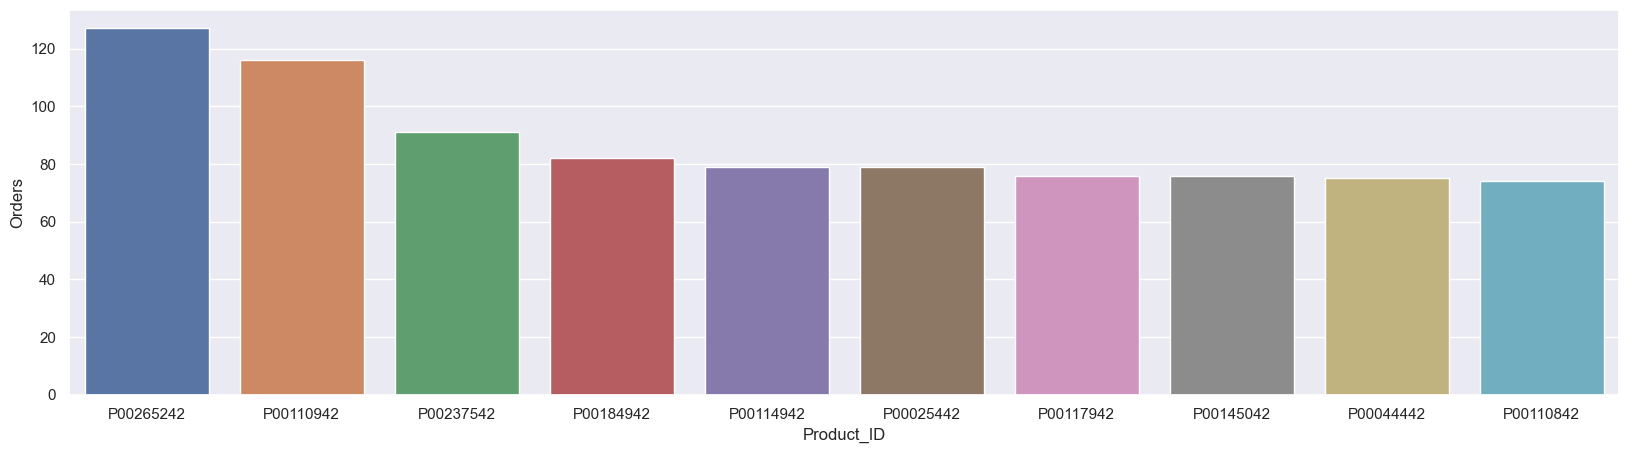

In [23]:
Sales_state= df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_state,x='Product_ID',y='Orders')

## Conclusion

*** married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, healtcare and Aviation are more likely to buy products from food, Clothing and Electronics Category***